## Loan Approval Prediction 

### Authors : 
- Mike Vogt
- Nicholas Baard
- Goolam Fareed Bangie

#### Purpose:
The aim of this project is to predict whether or not a person should be approved for a loan depending on the past information of the person

Firstly , important basic libraries need to be imported 

In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
np.set_printoptions(suppress=True)

The dataset for the project needs to be loaded

In [3]:
data = pd.read_csv('train_data.csv',delimiter=',')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Determine the data types each variable belongs to and if there any nulls in the variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Under the non-null count column above , the count for every variable is not 614 indicating certain variables contain nulls.
Certain variables are categorical while others are numerical , one hot encoding(for variables with only 2 unique values) and label encoding(for variables with more than 2 unique values/variables with some sort of order) will be done to convert the categorical data to numerical data for ease when working with the different machine learning algorithms. 

The size of the dataset is determined below

In [6]:
print("No of rows:",data.shape[0])
print("No of columns:",data.shape[1])

No of rows: 614
No of columns: 13


Determine the number of nulls per variable

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Nulls need to be filled in or dropped , Loan Amount, Loan_Amount_Term and Credit_History will be filled in with statistical values while the remaining nulls in the other variables will be dropped due to the fact that they are categorical and can't be filled in with statistical values. Loan Amount and Loan_Amount_Term nulls will be filled in with the current mean of Loan Amount and Loan_Amount_Term respectively while Credit_History will be filled in with its current median. 

In [8]:
mean_LoanAmount = data["LoanAmount"].mean()
data["LoanAmount"] = data["LoanAmount"].fillna(mean_LoanAmount)

mean_LoanAmount_Term = data["Loan_Amount_Term"].mean()
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(mean_LoanAmount_Term)

median_Credit_History = data["Credit_History"].median()
data["Credit_History"] = data["Credit_History"].fillna(median_Credit_History)

data.dropna(inplace=True)

In [9]:
data.shape

(554, 13)

Converting Loan_Status to a numerical value

In [10]:
data["Loan_Status"].replace('N',0,inplace=True)
data["Loan_Status"].replace('Y',1,inplace=True)

<AxesSubplot:title={'center':'Correlation Matrix of Continuous Variables'}>

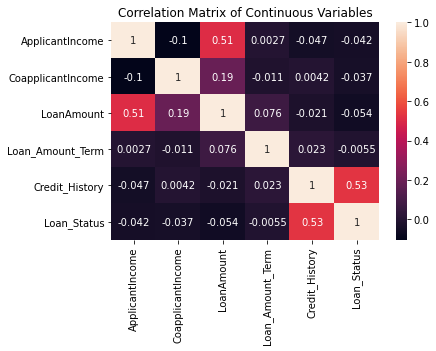

In [11]:
plt.title("Correlation Matrix of Continuous Variables")
corr = data.corr()
sns.heatmap(corr,annot=True)

It is quite clear that only Credit_History has a relationship with Loan_Status as the correlations between the other continuous variables and Loan_Status is very close to 0. For now we won't drop these columns which will allow us to compare the accuracy we get from models including these variables with models that don't contain these variables.

In [12]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [13]:
data = data.iloc[:,1:]

In [14]:
from sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()

In [15]:
data["Property_Area"] = LE.fit_transform(data["Property_Area"])

data["Dependents"] = LE.fit_transform(data["Dependents"])

data = pd.get_dummies(data)

data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,146.412162,360.0,1.0,2,1,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.000000,360.0,1.0,2,1,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,2,1,0,1,0,1,0,1,1,0
4,0,6000,0.0,141.000000,360.0,1.0,2,1,0,1,1,0,1,0,1,0


In [16]:
Y = data["Loan_Status"]
X = data.drop("Loan_Status",1)

Now that every variable is numerical , training and testing datasets can be specified from this original dataset

In [17]:
print(data.shape[0])
train_number = int(data.shape[0]*(80/100)) # calculate number of training examples
train_data = X.iloc[0:train_number,0:15] # split data into training data using the number calculated above
train_y = Y.iloc[0:train_number] # split target values into training target values
train_y = train_y.astype('int32') # convert labels to integer 
test_data = X.iloc[train_number:,0:15] # get test data from full data 
test_y = Y.iloc[train_number:] # get test target values from full dat
test_y = test_y.astype('int32') # convert labels to integer
print(train_data.shape)
print(train_y.shape)
print(test_data.shape)
print(test_y.shape)

554
(443, 15)
(443,)
(111, 15)
(111,)


### Logistic Regression Classifier

### Neural Networks Classifier

### Decision Tree Classifier

Firstly , the decision tree classifier is built using sklearn 

In [18]:
loan_tree_classifier = DecisionTreeClassifier()
loan_tree_classifier.fit(train_data,train_y)

DecisionTreeClassifier()

We then use our trained classifier to make predictions on our test data and store it in a variable called predicted_values

In [19]:
predicted_values = loan_tree_classifier.predict(test_data)

The accuracy of the prediction is then calculated. In this case the accuracy is quite low and thats due to the fact that our classifier contains variables that have very little correlation to the class label variable , we can improve accuracy by removing these variables or we can use improvement techniques such as normalising the data or using multiple trees instead of a single decision tree also known as a random forest.

In [20]:
accuracy_score(test_y,predicted_values)*100

73.87387387387388

Display the confusion matrix of the classification of the test data , diagonal elements represent the number of correct classifications whereas other elements represent the number of incorrect classifications.

<AxesSubplot:>

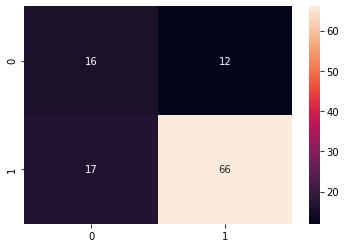

In [23]:
cf_matrix = confusion_matrix(predicted_values, test_y)
# heatmap of confusion matrix for model
sns.heatmap(cf_matrix, annot=True,fmt='g')